In [1]:
import signac
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

project = signac.get_project(root='../')
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)
df.head()

,L,NPROCS,T,data_dump_interval,job_type,output_type,trials,_status,analysis_output_time,analysis_output_time_sem,analysis_time,analysis_time_sem,diskstats,ete_simulation_time,output_time,root,signac_id,statepoint
0a60fe7724c5a11c5801695d0800d11b,60,1,1,500,traditional,dcd,2,{'a4md/0a60fe77/initialize/0000/b2b5882b74ad59...,NaN,NaN,NaN,NaN,{'2018-11-20T05:07:05+00:00': [{'nvme0n1': {'m...,820.449995,0.22986,/home/sthomas/projects/a4md/project/workspace,0a60fe7724c5a11c5801695d0800d11b,"{'NPROCS': 1, 'T': 1, 'L': 60, 'data_dump_inte..."
16fc124feb578b895c98a894ada319da,60,1,1,1000,traditional,dcd,1,{'a4md/16fc124f/initialize/0000/65934a3b13d38c...,NaN,NaN,NaN,NaN,{'2018-11-20T03:52:14+00:00': [{'nvme0n1': {'m...,825.483689,NaN,/home/sthomas/projects/a4md/project/workspace,16fc124feb578b895c98a894ada319da,"{'NPROCS': 1, 'T': 1, 'L': 60, 'data_dump_inte..."
2337e4e395d81f272c1be0dd241eed28,60,1,1,50,plumed_sequential,dcd,1,{'a4md/2337e4e3/initialize/0000/24ce0adb4e77cd...,NaN,NaN,NaN,NaN,{'2018-11-20T05:24:50+00:00': [{'nvme0n1': {'m...,NaN,NaN,/home/sthomas/projects/a4md/project/workspace,2337e4e395d81f272c1be0dd241eed28,"{'NPROCS': 1, 'T': 1, 'L': 60, 'data_dump_inte..."
2da4a613dfd968b8f7c6ec7bdaec8e74,60,1,1,10000,plumed_sequential,dcd,2,{'a4md/2da4a613/initialize/0000/4c972835cb492a...,1.062144,0.154815,234.900110,0.516980,{'2018-11-20T05:03:21+00:00': [{'nvme0n1': {'m...,1056.623397,NaN,/home/sthomas/projects/a4md/project/workspace,2da4a613dfd968b8f7c6ec7bdaec8e74,"{'NPROCS': 1, 'T': 1, 'L': 60, 'data_dump_inte..."
303681cd27773492440c11f6ae639ce8,60,1,1,500,plumed_sequential,dcd,1,{'a4md/303681cd/initialize/0000/bff29c1c10f309...,10.193701,0.013322,3096.834003,0.233867,{'2018-11-20T03:56:45+00:00': [{'nvme0n1': {'m...,3975.152329,NaN,/home/sthomas/projects/a4md/project/workspace,303681cd27773492440c11f6ae639ce8,"{'NPROCS': 1, 'T': 1, 'L': 60, 'data_dump_inte..."


In [2]:
import datetime as dt
from dateutil.parser import parse
from collections import defaultdict
def get_sim_time(log_file): # Modify and Output is left out):
    sim_time=0
    sim_time_labels = ['Pair','Neigh','Comm','Other']
    with open(log_file) as fp:
            for line in fp:
                values = line.split('|')
                if len(values)== 6 and any(label in values[0] for label in sim_time_labels):
                    values = line.split('|')
                    sim_time += float(values[2])
                
    return sim_time

def get_sim_out_time(log_file): # Modify and Output is left out):
    sim_time=0
    sim_time_labels = ['Output']
    with open(log_file) as fp:
            for line in fp:
                values = line.split('|')
                if len(values)== 6 and any(label in values[0] for label in sim_time_labels):
                    values = line.split('|')
                    sim_time += float(values[2])
                
    return sim_time

def get_transfer_time(job):
    tt = 0
    if job.sp.job_type == 'traditional':
        output_time_labels = ['Ouput']#'Pair','Neigh']#,'Comm','Other']#,'Modify','Ouput']
        with job, open("log.prod", "r") as log:
            for line in log:
                values = line.split('|')
                if len(values)== 6 and any(label in values[0] for label in output_time_labels):
                    values = line.split('|')
                    tt = float(values[2]) # Adding up times for all the analysis_time_labels
                    break
        if 'read_frames_time' in job.document:
            tt += job.document['read_frames_time']
        else:
            raise ValueError('read_frames_time not found in job document')
        #if 'analysis_output_time' in job.document:
        #    tt += job.document['analysis_output_time']
        #else:
        #    raise ValueError('analysis_output_time not found in job document')

    else:
        #job.document['ete_analysis_time'] = get_ete_analysis_time(job)
        if 'analysis_time' in job.document: # analysis time is written from the analysis script
            tt = job.document['ete_analysis_time']-job.document['analysis_time']
        else:
            raise ValueError('analysis_time is not in the job document.')
        if 'analysis_output_time' in job.document:
            tt -= job.document['analysis_output_time']
        else:
            raise ValueError('analysis_output_time not found in job document')

    return tt

def parse_disstats(line):
    columns_disk = ['major_dev_num', 'minor_dev_num', 'device', 'reads', 'reads_merged', 'sectors_read', 'ms_reading', 'writes', 'writes_merged', 'sectors_written', 'ms_writing', 'current_ios', 'ms_doing_io', 'weighted_ms_doing_io']
    columns_partition = ['major_dev_num', 'minor_dev_num', 'device', 'reads', 'sectors_read', 'writes', 'sectors_written']

    result = {}
    if line != '':
        parts = line.split()
        if len(parts) == len(columns_disk):
            columns = columns_disk
        elif len(parts) == len(columns_partition):
            columns = columns_partition
        else:
            print(line)
            print('--------===========Cannot figure out this length')
            #raise ValueError('unknown length found')
        data = dict(zip(columns_disk, parts))
        #print(data)
        result[data['device']] = dict((k, int(v)) for k, v in data.items() if k != 'device')
    return result
    
def get_diskstats(job):
    iostat_dict = defaultdict(list)
    if job.isfile('iostats.log'):
        with open(job.fn('iostats.log')) as f:
            for line in f:
                #print(line)
                try:
                    dateandtime = parse(line)
                    #print(type(dateandtime))
                    isdate=True
                except ValueError as err:
                    isdate = False
                    #parse_disstats(line)
                    pass
                if not isdate:
                    result = parse_disstats(line)
                    iostat_dict[dateandtime.isoformat()].append(result)
    return iostat_dict

#df['simulation time']=get_sim_time(project.open_job(df.signac_id.values).fn('log.prod'))
for jobid in df.index:
    job=project.open_job(id=jobid)
    
    job.document['diskstats'] = get_diskstats(job)
    
    
    #job.document.output_time = get_sim_out_time(job.fn('log.prod'))
    #job.document.transfer_time = get_transfer_time(job)
    #if 'plumed' in job.sp.job_type:
    #    job.document['frames_transfer_time'] = job.document.transfer_time# - job.document.analysis_output_time
    #else:
    #    job.document['frames_transfer_time'] = job.document.output_time + job.document.read_frames_time

df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)

50
traditional len 1
3af56971cfa9cb45845418c5e557232a    1
Name: trials, dtype: object


/home/sthomas/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sthomas/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(39.1944,0.5,'Instantaneous\n Bytes Written [MB]')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


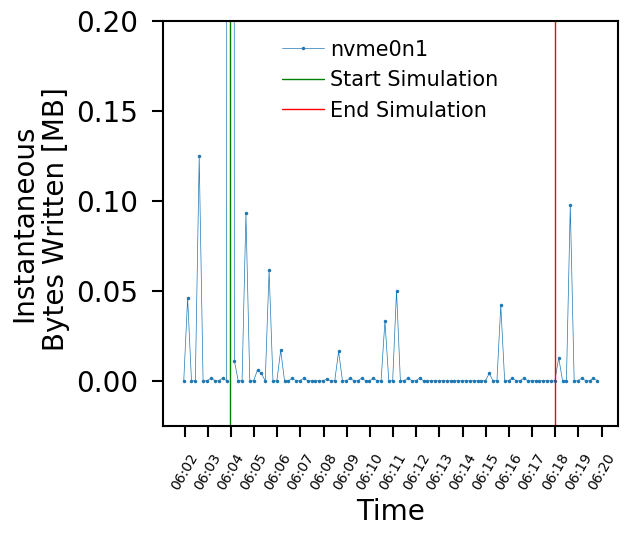

In [3]:
import numpy as np
from scipy import optimize
from dateutil.parser import parse
import matplotlib.dates as md

fig, ax = plt.subplots()
df_filtered = df[(df.L==60)&
                 (df.data_dump_interval==50)&
                 (df.trials==1)&
                 (df.job_type=='traditional')&
                 (df.output_type=='dcd')]
for i,(L,df_L_grp) in enumerate(df_filtered.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):

        dump_intervals = []
        write_ms_mean = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            print(ddi)
            write_ms_trials = []
            
            for trial, df_trial in df_grp.groupby('trials'):
                diskstats = df_trial.diskstats.values
                print(job_type,'len',len(diskstats))
                print(df_trial.trials)
                times = []
                write_ms=defaultdict(list)
                for ds in diskstats:
                    for time, devices in ds.items():
                        #print(time, stats['dm-2']['ms_doing_io'])
                        times.append(parse(time))
                        
                        for device_stats in devices:
                            for dev in device_stats:
                                if 'nvme0n1' == dev:#dev!='nvme0n1':
                                    write_ms[dev].append(device_stats[dev]['sectors_written']*512)
                            #if 'nvme0n1' in device.keys():
                                #write_ms.append(int(device['nvme0n1']['weighted_ms_doing_io']))
                        #    print(dstat)
                        #    print(time, device)# stats[device]['ms_doing_io'])
                        #    break
                    #write_ms.append(df_trial.diskstats[''])
                    #break
                #write_ms_trials.append(np.asarray(write_ms))
                #print(times,write_ms)
                for device in write_ms:
                    yvals = np.asarray(write_ms[device])
                    yvals = yvals/1e6
                    #print(len(yvals))
                    yvals = np.insert(np.diff(yvals),0,0)
                    #print(yvals)
                    #yvals = np.add.accumulate(yvals)
                    xfmt = md.DateFormatter('%H:%M')
                    ax.xaxis.set_major_formatter(xfmt)
                    plt.plot_date(times,yvals, "o-",label=device,markersize=1, linewidth=0.5)
                plt.axvline(x=times[12],label='Start Simulation', linewidth=1, color='g')
                plt.axvline(x=times[-12],label='End Simulation', linewidth=1, color='r')
                #plt.axhline(y=468413188, label='dcd file size (bytes)', linewidth=1)
                ax.xaxis.set_tick_params(rotation=60, labelsize=10)
                ax.xaxis.set_major_locator(md.MinuteLocator(interval=1)) 
                break
            #print(a_times_sem)
            write_mean_times = np.asarray(write_ms_trials)
            #print(type(write_mean_times))
            write_ms_mean.append(np.mean(write_mean_times))
            
            
#print(write_ms_mean)
plt.legend(fontsize=15, ncol=1)
plt.tight_layout()
plt.ylim(-0.025,0.2)
#plt.yscale('log')
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Instantaneous\n Bytes Written [MB]', fontsize=20)

50
traditional len 1
3af56971cfa9cb45845418c5e557232a    1
Name: trials, dtype: object


/home/sthomas/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sthomas/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(39.1944,0.5,'Cumulative Bytes Written (MB)')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


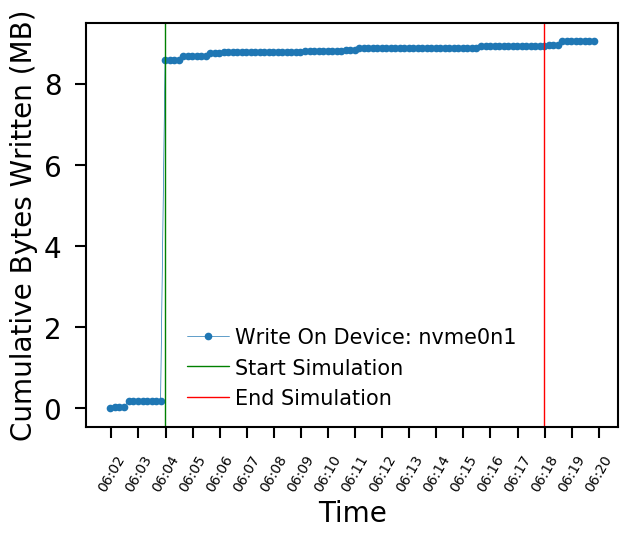

In [4]:
import numpy as np
from scipy import optimize
from dateutil.parser import parse
import matplotlib.dates as md

fig, ax = plt.subplots()
df_filtered = df[(df.L==60)&
                 (df.data_dump_interval==50)&
                 (df.trials==1)&
                 (df.job_type=='traditional')&
                 (df.output_type=='dcd')]
for i,(L,df_L_grp) in enumerate(df_filtered.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):

        dump_intervals = []
        write_ms_mean = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            print(ddi)
            write_ms_trials = []
            
            for trial, df_trial in df_grp.groupby('trials'):
                diskstats = df_trial.diskstats.values
                print(job_type,'len',len(diskstats))
                print(df_trial.trials)
                times = []
                write_ms=defaultdict(list)
                for ds in diskstats:
                    for time, devices in ds.items():
                        #print(time, stats['dm-2']['ms_doing_io'])
                        times.append(parse(time))
                        
                        for device_stats in devices:
                            for dev in device_stats:
                                if 'nvme0n1' == dev:#dev!='nvme0n1':
                                    write_ms[dev].append(device_stats[dev]['sectors_written']*512)
                            #if 'nvme0n1' in device.keys():
                                #write_ms.append(int(device['nvme0n1']['weighted_ms_doing_io']))
                        #    print(dstat)
                        #    print(time, device)# stats[device]['ms_doing_io'])
                        #    break
                    #write_ms.append(df_trial.diskstats[''])
                    #break
                #write_ms_trials.append(np.asarray(write_ms))
                #print(times,write_ms)
                for device in write_ms:
                    yvals = np.asarray(write_ms[device])
                    yvals = yvals/1e6
                    #print(len(yvals))
                    yvals = np.insert(np.diff(yvals),0,0)
                    #print(yvals)
                    yvals = np.add.accumulate(yvals)
                    xfmt = md.DateFormatter('%H:%M')
                    ax.xaxis.set_major_formatter(xfmt)
                    plt.plot_date(times,yvals, "o-",label='Write On Device: {}'.format(device),markersize=4, linewidth=0.5)
                plt.axvline(x=times[12],label='Start Simulation', linewidth=1, color='g')
                plt.axvline(x=times[-12],label='End Simulation', linewidth=1, color='r')
                #plt.axhline(y=468413188/1e6, label='dcd file size (bytes)', linewidth=1)
                ax.xaxis.set_tick_params(rotation=60, labelsize=10)
                ax.xaxis.set_major_locator(md.MinuteLocator(interval=1)) 
                break
            #print(a_times_sem)
            write_mean_times = np.asarray(write_ms_trials)
            #print(type(write_mean_times))
            write_ms_mean.append(np.mean(write_mean_times))
            
            
#print(write_ms_mean)
plt.legend(fontsize=15, ncol=1)
plt.tight_layout()
#plt.ylim(-0.025,10)

#fig.autofmt_xdate()
#plt.yscale('log')
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Cumulative Bytes Written (MB)', fontsize=20)

50
traditional len 1
3af56971cfa9cb45845418c5e557232a    1
Name: trials, dtype: object


/home/sthomas/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sthomas/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(-28.3056,0.5,'Cumulative Bytes Read [MB]')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


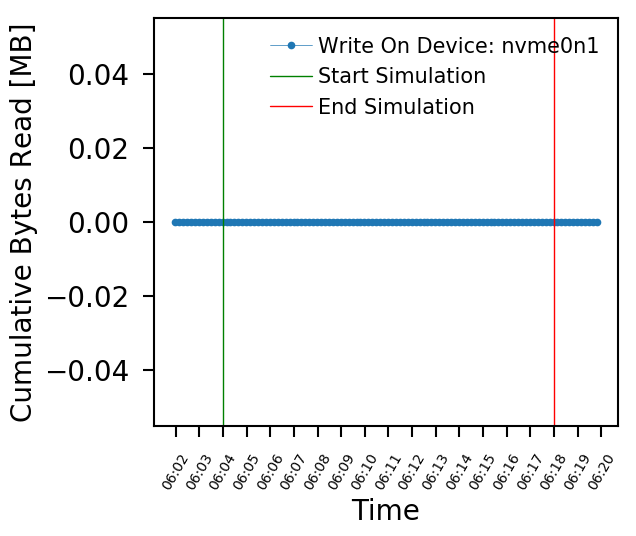

In [171]:
import numpy as np
from scipy import optimize
from dateutil.parser import parse
import matplotlib.dates as md

fig, ax = plt.subplots()
df_filtered = df[(df.L==60)&
                 (df.data_dump_interval==50)&
                 (df.trials==1)&
                 (df.job_type=='traditional')&
                 (df.output_type=='dcd')]
for i,(L,df_L_grp) in enumerate(df_filtered.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):

        dump_intervals = []
        write_ms_mean = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            print(ddi)
            write_ms_trials = []
            
            for trial, df_trial in df_grp.groupby('trials'):
                diskstats = df_trial.diskstats.values
                print(job_type,'len',len(diskstats))
                print(df_trial.trials)
                times = []
                write_ms=defaultdict(list)
                for ds in diskstats:
                    for time, devices in ds.items():
                        #print(time, stats['dm-2']['ms_doing_io'])
                        times.append(parse(time))
                        
                        for device_stats in devices:
                            for dev in device_stats:
                                if 'nvme0n1' == dev:#dev!='nvme0n1':
                                    write_ms[dev].append(device_stats[dev]['sectors_read']*512)
                            #if 'nvme0n1' in device.keys():
                                #write_ms.append(int(device['nvme0n1']['weighted_ms_doing_io']))
                        #    print(dstat)
                        #    print(time, device)# stats[device]['ms_doing_io'])
                        #    break
                    #write_ms.append(df_trial.diskstats[''])
                    #break
                #write_ms_trials.append(np.asarray(write_ms))
                #print(times,write_ms)
                for device in write_ms:
                    yvals = np.asarray(write_ms[device])
                    yvals = yvals/1e6
                    #print(len(yvals))
                    yvals = np.insert(np.diff(yvals),0,0)
                    #print(yvals)
                    yvals = np.add.accumulate(yvals)
                    xfmt = md.DateFormatter('%H:%M')
                    ax.xaxis.set_major_formatter(xfmt)
                    plt.plot_date(times,yvals, "o-",label='Write On Device: {}'.format(device),markersize=4, linewidth=0.5)
                plt.axvline(x=times[12],label='Start Simulation', linewidth=1, color='g')
                plt.axvline(x=times[-12],label='End Simulation', linewidth=1, color='r')
                #plt.axhline(y=468413188/1e6, label='dcd file size (bytes)', linewidth=1)
                ax.xaxis.set_tick_params(rotation=60, labelsize=10)
                ax.xaxis.set_major_locator(md.MinuteLocator(interval=1)) 
                break
            #print(a_times_sem)
            write_mean_times = np.asarray(write_ms_trials)
            #print(type(write_mean_times))
            write_ms_mean.append(np.mean(write_mean_times))
            
            
#print(write_ms_mean)
plt.legend(fontsize=15, ncol=1)
plt.tight_layout()
#plt.ylim(-0.025,10)

#fig.autofmt_xdate()
#plt.yscale('log')
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Cumulative Bytes Read [MB]', fontsize=20)

50
traditional len 1
3af56971cfa9cb45845418c5e557232a    1
Name: trials, dtype: object


/home/sthomas/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sthomas/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(-5.18056,0.5,'Cumulative Write Time [S]')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


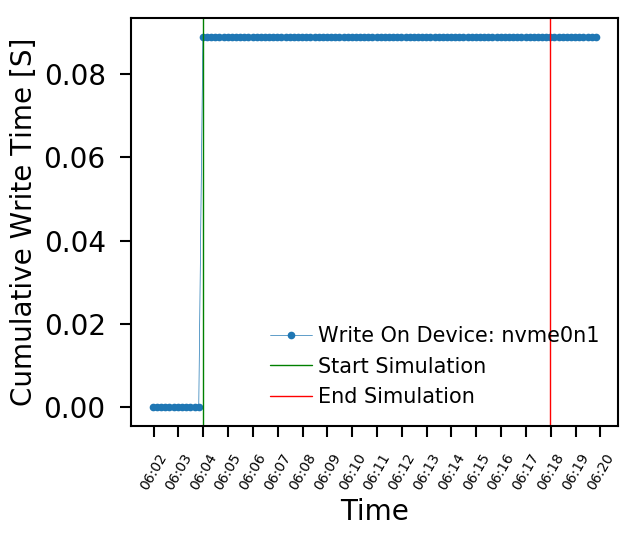

In [174]:
import numpy as np
from scipy import optimize
from dateutil.parser import parse
import matplotlib.dates as md

fig, ax = plt.subplots()
df_filtered = df[(df.L==60)&
                 (df.data_dump_interval==50)&
                 (df.trials==1)&
                 (df.job_type=='traditional')&
                 (df.output_type=='dcd')]
for i,(L,df_L_grp) in enumerate(df_filtered.groupby('L')):
    for i,(job_type,df_job_type_grp) in enumerate(df_L_grp.groupby('job_type')):

        dump_intervals = []
        write_ms_mean = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            print(ddi)
            write_ms_trials = []
            
            for trial, df_trial in df_grp.groupby('trials'):
                diskstats = df_trial.diskstats.values
                print(job_type,'len',len(diskstats))
                print(df_trial.trials)
                times = []
                write_ms=defaultdict(list)
                for ds in diskstats:
                    for time, devices in ds.items():
                        #print(time, stats['dm-2']['ms_doing_io'])
                        times.append(parse(time))
                        
                        for device_stats in devices:
                            for dev in device_stats:
                                if 'nvme0n1' == dev:#dev!='nvme0n1':
                                    write_ms[dev].append(device_stats[dev]['ms_writing'])
                            #if 'nvme0n1' in device.keys():
                                #write_ms.append(int(device['nvme0n1']['weighted_ms_doing_io']))
                        #    print(dstat)
                        #    print(time, device)# stats[device]['ms_doing_io'])
                        #    break
                    #write_ms.append(df_trial.diskstats[''])
                    #break
                #write_ms_trials.append(np.asarray(write_ms))
                #print(times,write_ms)
                for device in write_ms:
                    yvals = np.asarray(write_ms[device])
                    yvals = yvals/1e3
                    #print(len(yvals))
                    yvals = np.insert(np.diff(yvals),0,0)
                    #print(yvals)
                    yvals = np.add.accumulate(yvals)
                    xfmt = md.DateFormatter('%H:%M')
                    ax.xaxis.set_major_formatter(xfmt)
                    plt.plot_date(times,yvals, "o-",label='Write On Device: {}'.format(device),markersize=4, linewidth=0.5)
                plt.axvline(x=times[12],label='Start Simulation', linewidth=1, color='g')
                plt.axvline(x=times[-12],label='End Simulation', linewidth=1, color='r')
                #plt.axhline(y=468413188/1e6, label='dcd file size (bytes)', linewidth=1)
                ax.xaxis.set_tick_params(rotation=60, labelsize=10)
                ax.xaxis.set_major_locator(md.MinuteLocator(interval=1)) 
                break
            #print(a_times_sem)
            write_mean_times = np.asarray(write_ms_trials)
            #print(type(write_mean_times))
            write_ms_mean.append(np.mean(write_mean_times))
            
            
#print(write_ms_mean)
plt.legend(fontsize=15, ncol=1)
plt.tight_layout()
#plt.ylim(-0.025,10)

#fig.autofmt_xdate()
#plt.yscale('log')
#plt.xlim(np.min(xvals)-100,np.max(xvals)+100)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Cumulative Write Time [S]', fontsize=20)